In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [2]:
Zhou_fl = pd.read_csv('../../Data/Zhou/Lagator_Zhou.csv')
Zhou_fl.head()

,Name,sfGFP/OD600,Sequence
0,ML1,594.410800,TTGACAATTAATCATCCGGCTCGTATAATGTGTGGAATTGTGAGCG...
1,ML2,9790.185077,TTGACAATTAATCATCCGGCTCGTATAATGTGCGGAATTGTAAGCG...
2,ML3,1770.433060,TTGACAATTAATCATCCGGCTCGTATAATGTGTGGAATTGTGGGCG...
3,ML4,24277.733500,TTGACAATTAATCATCCGGCTCGTATAATGTGTGGAATTGCGGGCG...
4,ML5,12023.942940,TTGACAATTAATCACCCGGCTCGTATAATGTGTGGAGTTGTGAGCA...


### LaFleur log(TX/TX_ref) to platereader fluorescence

In [3]:
Lagator_36N_TX = pd.read_csv('../../Data/LaFleur_supp/supp_8_Lagator_36N.csv')[['Promoter', 'Observed log(TX/Txref)', 'Normalized Transcription Rates [TX/TXref]']]
Lagator_36N_TX['Promoter'] = Lagator_36N_TX['Promoter'].str.slice(40, -40).str.upper()


Lagator_36N_fl = pd.read_csv('../../Data/Lagator/unique_36_bp_sequences.csv')[['36N sequence', 'Platereader fluorescence (low gain, monochromator, normalized to OD and to bin 1 fluorescence)']]
Lagator_36N_fl = Lagator_36N_fl.rename(columns={'36N sequence': 'Promoter', 'Platereader fluorescence (low gain, monochromator, normalized to OD and to bin 1 fluorescence)': 'fluorescence'})

merged_36N = Lagator_36N_TX.merge(Lagator_36N_fl, on='Promoter', how='right')
merged_36N = merged_36N.dropna()

merged_36N.head()

,Promoter,Observed log(TX/Txref),Normalized Transcription Rates [TX/TXref],fluorescence
0,AAGCCCCCCCGTCAACATCTGTGTTGAAGGTGACAT,-3.442169,31.254668,1.53
1,GAATTCGATAGCTCTTATATCACTAACATCAGAGTG,-3.910456,49.921726,0.91
2,GGTATCCAGCAAACGAACGAAAAAGTCGTGGAACGA,-3.666591,39.118324,1.12
3,ACCCCCAAGTCCCGCGTGTGAGTGCCACCATTAGGT,-3.574440,35.674620,0.83
4,CTAGAGTCTAATACTAAAACCTCGGATTCCTGAGGT,-4.640646,103.611310,1.23


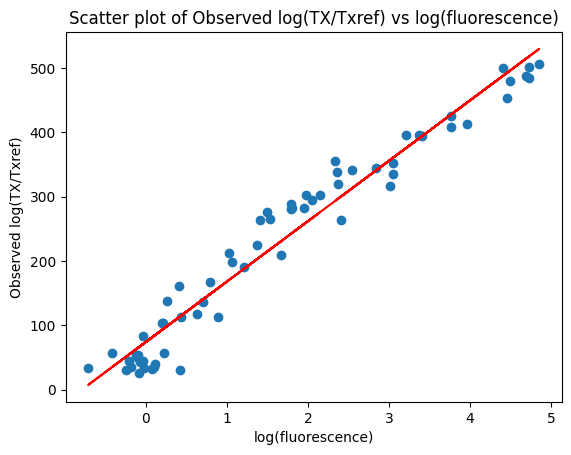

In [4]:
# Plot data
X = np.log(merged_36N['fluorescence']).values.reshape(-1, 1)
y = merged_36N['Normalized Transcription Rates [TX/TXref]']

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict values
y_pred = model.predict(X)

# Plot data and regression line
plt.scatter(X, y, label='Data')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.title('Scatter plot of Observed log(TX/Txref) vs log(fluorescence)')
plt.xlabel('log(fluorescence)')
plt.ylabel('Observed log(TX/Txref)')
plt.show()


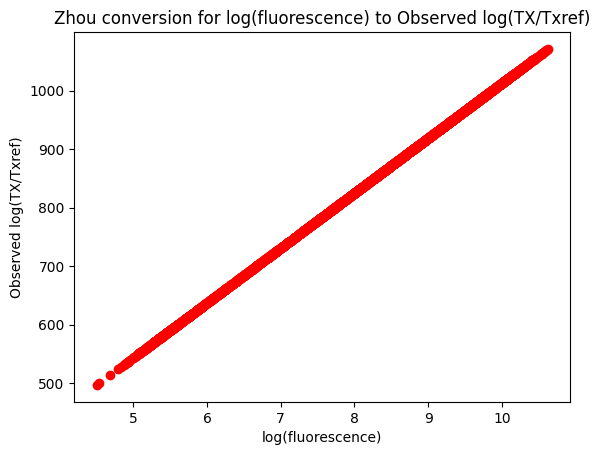

In [5]:
# Fit linear regression model
X = np.log(Zhou_fl['sfGFP/OD600']).values.reshape(-1, 1)
y_pred = model.predict(X)

plt.scatter(X, y_pred, color='red', label='Regression line')
plt.title('Zhou conversion for log(fluorescence) to Observed log(TX/Txref)')
plt.xlabel('log(fluorescence)')
plt.ylabel('Observed log(TX/Txref)')
plt.show()


In [23]:
# Conversion equation

print(f'Observed log(TX/Txref) = {round(model.intercept_, 2)} + ({round(model.coef_[0], 2)} * log(fluorescence))')

Observed log(TX/Txref) = 74.23 + (93.83 * log(fluorescence))
